Assignment 1 - EE6310

In [227]:
%matplotlib inline
import math
import matplotlib.pyplot as plt
from PIL import Image as Img
import numpy as np
import os

Part 1 - Human Eye

In [228]:
def opt_dist(size, res):
  cycles = 6
  avail_dist = int(input('Enter Available Distance: '))
  dist = cycles * size / (res * math.tan(math.pi / (360 * 2)))
  if (dist < avail_dist):
    return dist
  else:
    return avail_dist

size = int(input('Enter TV Size: '))
res = int(input('Enter TV Resolution: '))
print(opt_dist(size, res))

Enter TV Size: 35
Enter TV Resolution: 1000
Enter Available Distance: 40
40


Part 2 - Gray Scale Images

Q1

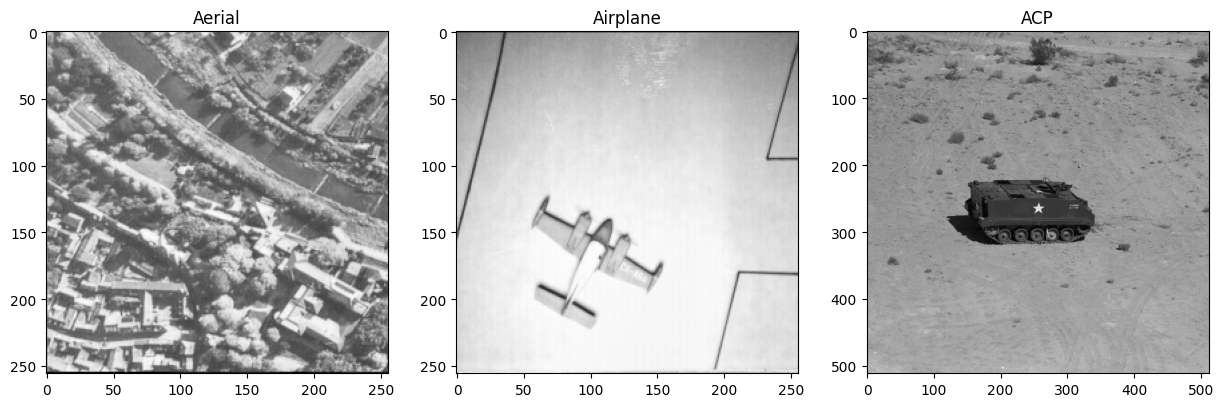

In [229]:
filenames = {'Aerial': '5.1.10.tiff', 'Airplane': '5.1.11.tiff', 'ACP': '7.1.08.tiff'}

I = {}
for i, files in enumerate(filenames):
  I[files] = np.asarray(Img.open(filenames[files]))
  axs[i].imshow(I[files], cmap = 'gray')
  axs[i].set_title(files)
plt.show()

Q2

In [230]:
for img in I:
  print(img)
  print("The maximum pixel value in is:", I[img].max())
  print("The minimum pixel value in is:", I[img].min())
  print("The number of bits needed are", len(bin(I[img].max()).replace("0b","")))
  print("The width and height of the image are: ", len(I[img]), len(I[img][0]), "\n")


Aerial
The maximum pixel value in is: 248
The minimum pixel value in is: 1
The number of bits needed are 8
The width and height of the image are:  256 256 

Airplane
The maximum pixel value in is: 232
The minimum pixel value in is: 0
The number of bits needed are 8
The width and height of the image are:  256 256 

ACP
The maximum pixel value in is: 215
The minimum pixel value in is: 12
The number of bits needed are 8
The width and height of the image are:  512 512 



Q3

In [231]:
for img in I:
  print(img)
  print(f'Size of Compressed Image: {os.stat(filenames[img]).st_size}')
  print(f'Efficiency of Compression: {(os.stat(filenames[img]).st_size * 8) / (len(I[img]) * len(I[img][0]) * 8)} \n')


Aerial
Size of Compressed Image: 65670
Efficiency of Compression: 1.002044677734375 

Airplane
Size of Compressed Image: 65670
Efficiency of Compression: 1.002044677734375 

ACP
Size of Compressed Image: 262278
Efficiency of Compression: 1.0005111694335938 



Q4

Enter value of b: 5


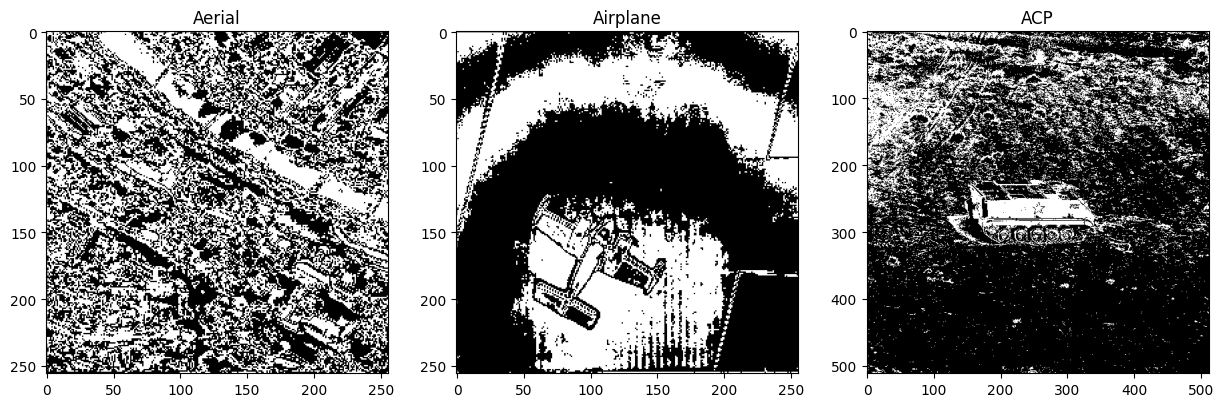

In [232]:
def bit(I, b):
  X = np.zeros(I.shape)
  for i in range(len(I)) :
      for j in range(len(I[0])):
          tmp = I[i][j] & (2**b)
          if tmp == 0:
              X[i][j] = 0
          else:
              X[i][j] = 255
  return X

b = int(input('Enter value of b: '))
fig, axs = plt.subplots(1, len(filenames), figsize=(15, 5))
for i, img in enumerate(I):
  X = bit(I[img], b)
  axs[i].imshow(X, cmap = 'gray')
  axs[i].set_title(img)
plt.show()

Part 3 - Binary Image Processing

Q1

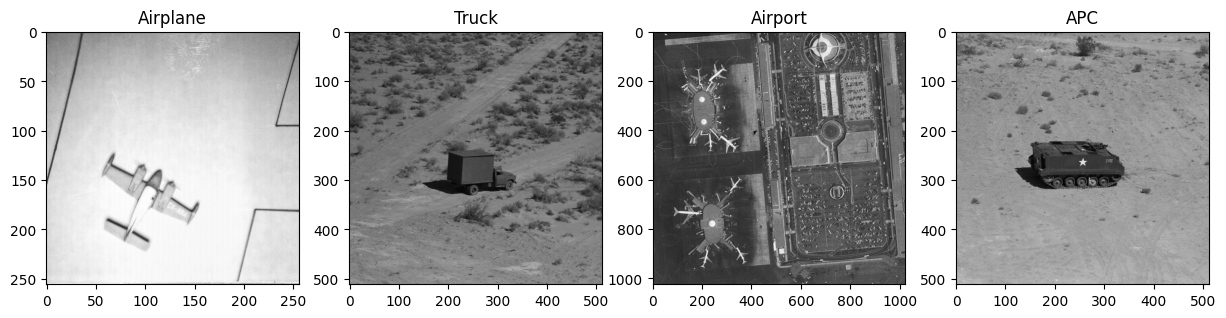

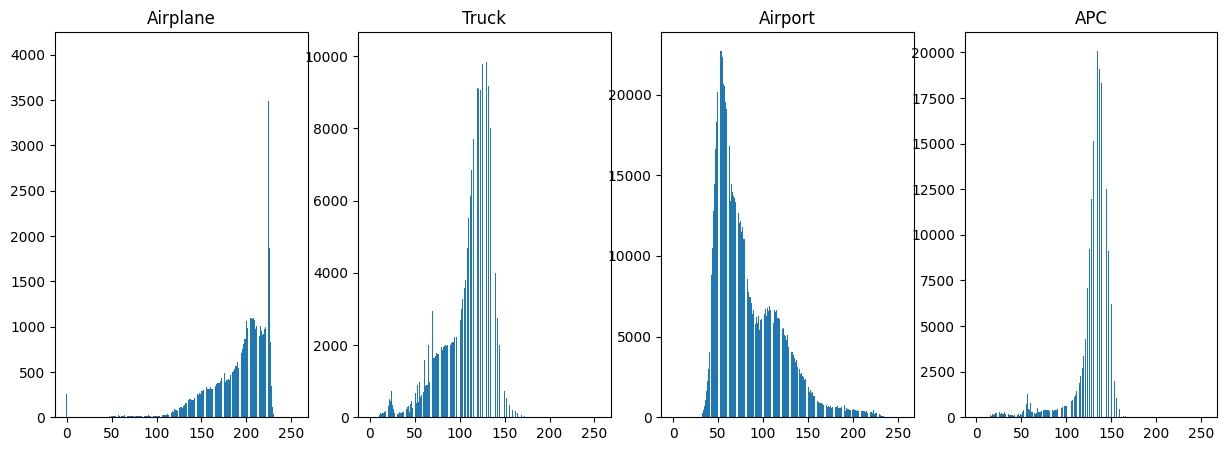

All images have Modality: 1


In [233]:
filenames = {'Airplane': '5.1.11.tiff', 'Truck': '7.1.01.tiff', 'Airport': '5.3.02.tiff', 'APC': '7.1.08.tiff'}
fig, axs = plt.subplots(1, len(filenames), figsize=(15, 5))
I = {}
for i, files in enumerate(filenames):
  I[files] = np.asarray(Img.open(filenames[files]))
  axs[i].imshow(I[files], cmap = 'gray')
  axs[i].set_title(files)
plt.show()

fig, ax = plt.subplots(1, len(filenames), figsize=(15, 5))
for i, img in enumerate(I):
  X = np.zeros(256, dtype = int)
  for j in I[img].flatten():
      X[j] += 1
  ax[i].bar(np.arange(256), X)
  ax[i].set_title(img)
plt.show()
print("All images have Modality: 1")

Q2

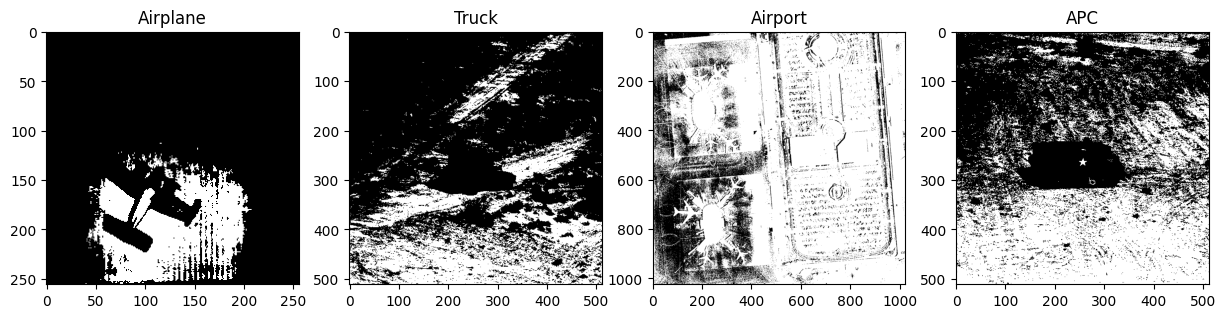

In [234]:
def binary_modal(I, b):
  X = np.zeros(I.shape)
  for i in range(len(I)) :
      for j in range(len(I[0])):
          if I[i][j] < b:
              X[i][j] = 0
          else:
              X[i][j] = 255
  return X

fig, axs = plt.subplots(1, len(filenames), figsize=(15, 5))
for i, img in enumerate(I):
  vals, counts = np.unique(I[img].flatten(), return_counts=True)
  mode_value = np.argwhere(counts == np.max(counts))
  mode = vals[mode_value[0][0]]
  X = binary_modal(I[img], mode)
  axs[i].imshow(X, cmap = 'gray')
  axs[i].set_title(img)
plt.show()

Q3

a)

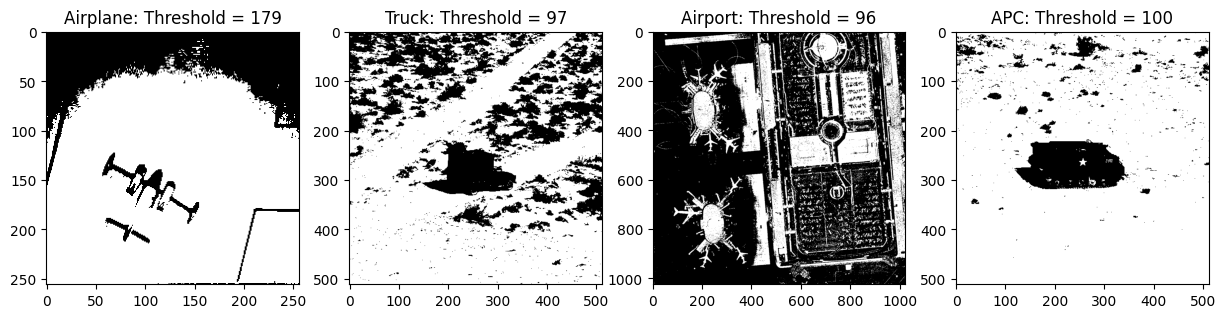

In [235]:
def threshold(img):
    pmf, bins = np.histogram(img.ravel(), bins=256, range=(0.0, 255.0))
    weight = np.cumsum(pmf) / np.size(img)
    min_var = 1E6
    t = 0

    for i in np.arange(1, 256):
        if weight[i - 1] == 0 or weight[i - 1] == 1:
            continue

        pixel_1 = img[img >= i]
        pixel_0 = img[img < i]
        var0 = np.var(pixel_0) if len(pixel_0) > 0 else 0
        var1 = np.var(pixel_1) if len(pixel_1) > 0 else 0
        var = var0 * weight[i - 1] + var1 * (1 - weight[i - 1])

        if var < min_var:
            min_var = var
            t = i
    return t

fig, axs = plt.subplots(1, len(filenames), figsize=(15, 5))
for i, img in enumerate(I):
  thres = threshold(I[img])
  binary = (I[img] >= thres).astype(np.uint8) * 255
  axs[i].imshow(binary, cmap='gray')
  axs[i].set_title(f'{img}: Threshold = {thres}')
plt.show()

b)

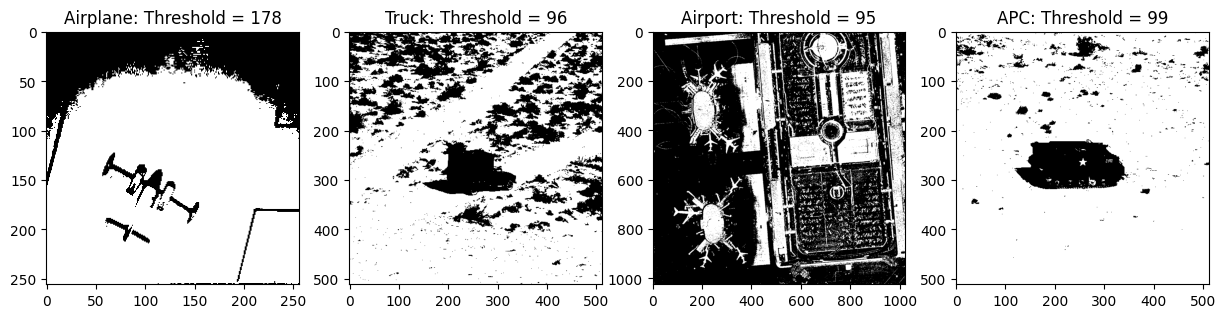

In [236]:
def threshold(img):
    pmf, bins = np.histogram(img.ravel(), bins=256, range=(0.0, 255.0))
    weight = np.cumsum(pmf) / np.size(img)
    pmf = pmf / np.size(img)
    max_var = 0
    t = 0
    mu = np.mean(img)
    mu_0 = np.zeros(256)
    mu_1 = np.zeros(256)

    for i in np.arange(1, 256):
        if weight[i] != 0:
            mu_0[i] = (mu_0[i - 1] * weight[i - 1] + (i) * pmf[i]) / weight[i]
        if weight[i] != 1:
            mu_1[i] = (mu - mu_0[i] * weight[i]) / (1 - weight[i])

        var = (weight[i]) * (1 - weight[i]) * pow(mu_0[i] - mu_1[i], 2)

        if var > max_var:
            max_var = var
            t = i

    return t

fig, axs = plt.subplots(1, len(filenames), figsize=(15, 5))
for i, img in enumerate(I):
  thres = threshold(I[img])
  binary = (I[img] >= thres).astype(np.uint8) * 255
  axs[i].imshow(binary, cmap='gray')
  axs[i].set_title(f'{img}: Threshold = {thres}')
plt.show()

Q4

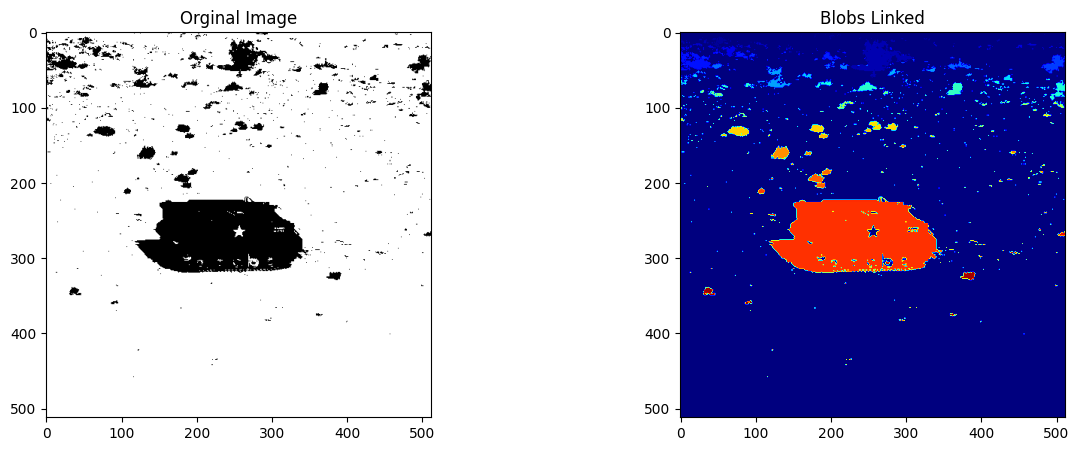

In [237]:
I_b = binary
img = np.ones((I_b.shape[0] + 1, I_b.shape[1] + 1), dtype = np.int16)
img[1:, 1:] = I_b
R = np.zeros((I_b.shape[0] + 1, I_b.shape[1] + 1), dtype = np.int16)
k = 1
links = {}

def check(key, link):
  if link.get(key) is None:
    return False
  else:
    return True

for i in range(1, len(img)):
    for j in range(1, len(img)):
        if img[i, j] == 0:
            if R[i, j - 1] == 0 and R[i - 1, j] == 0:
                R[i, j] = k
                k += 1
            elif R[i, j - 1] != 0 and R[i - 1, j] == 0:
                R[i, j] = R[i, j - 1]
            elif R[i, j - 1] == 0 and R[i - 1, j] != 0:
                R[i, j] = R[i - 1, j]
            else:
                if R[i - 1, j] != R[i, j - 1]:
                    key = min(R[i - 1, j], R[i, j - 1])
                    while check(key, links):
                        key = links[key]
                    links[max(R[i - 1, j], R[i, j - 1])] = key
                R[i, j] = min(R[i - 1, j], R[i, j - 1])

for i in range(len(I_b)):
    for j in range(len(I_b[0])):
        if R[i, j] != 0 and check(R[i, j], links):
            R[i, j] = links[R[i, j]]

R = R[1:, 1:]
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(I_b, cmap = 'gray')
axs[0].set_title('Orginal Image')
axs[1].imshow(R, cmap = 'jet')
axs[1].set_title('Blobs Linked')
plt.show()

Q5

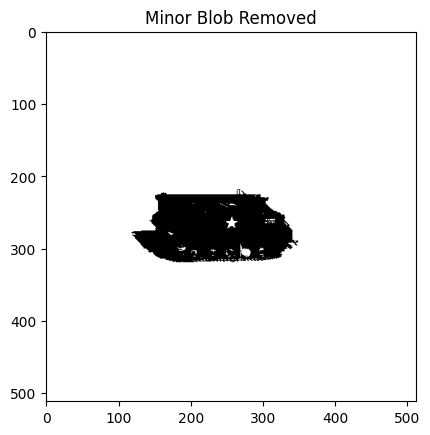

In [238]:
label, count = np.unique(R[R != 0], return_counts = True)
val_index = np.argmax(count)
val = label[val_index]

for i in range(len(R)):
    for j in range(len(R[0])):
        if R[i, j] != val:
            R[i, j] = 0

major_blob = ~(R.astype('bool'))
plt.imshow(major_blob, cmap='gray')
plt.title('Minor Blob Removed')
plt.show()

Part 4 - Binary Morphology

Q1

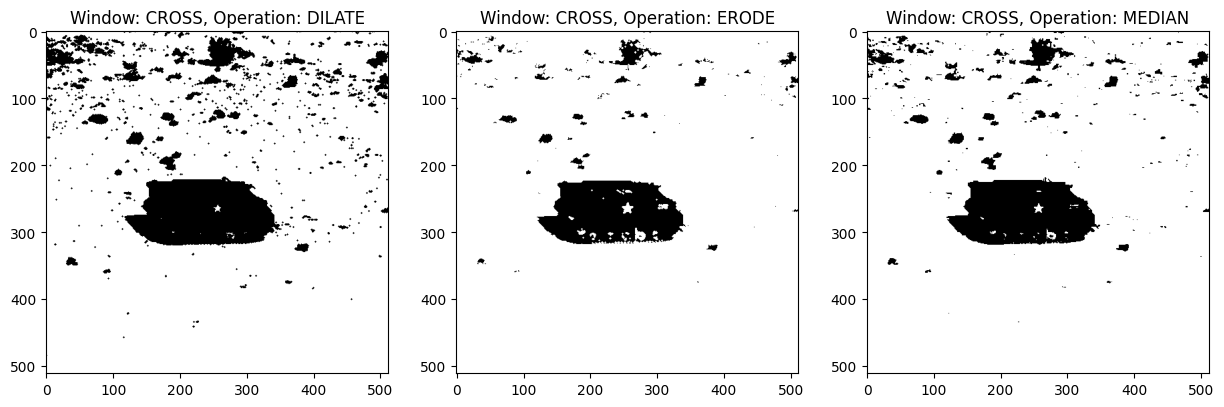

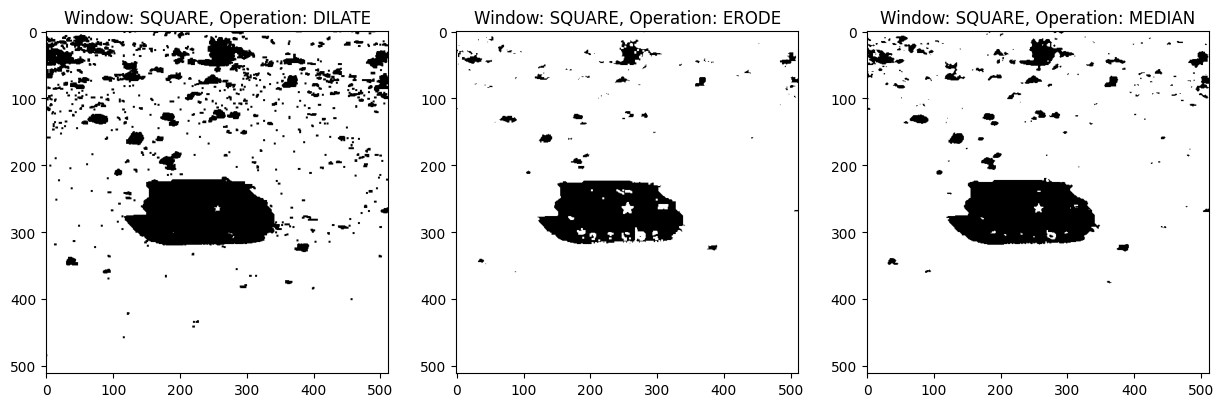

In [239]:
win_ty = ['CROSS', 'SQUARE']
op_ty = ['DILATE', 'ERODE', 'MEDIAN']

def comp(X):
    Y = np.zeros(X.shape)
    for i in range(len(X)):
        for j in range(len(X[0])):
            if X[i][j] == 0:
                Y[i][j] = 1
            else:
                Y[i][j] = 0
    return Y.astype(int)

def window(ty, n, X):
  out = [[[] for l in range(len(X[0]))] for k in range(len(X))]

  match ty:
    case 'CROSS':
      size = n//4
      p = np.arange(-size, size + 1)
      for i in range(len(X)):
        for j in range(len(X[0])):
          for m in p:
            if m != 0:
              if i + m < len(X) and i + m >= 0:
                out[i][j].append(X[i + m][j])
              if j + m < len(X[0]) and j + m >= 0:
                out[i][j].append(X[i][j + m])
            if m == 0:
              out[i][j].append(X[i][j])

    case 'SQUARE':
      size = n//2
      p = np.arange(-size, size + 1)
      for i in range(len(X)):
        for j in range(len(X[0])):
          for m in p:
              for n in p:
                if i + m < len(X) and i + m >= 0 and j + n < len(X[0]) and j + n >= 0:
                  out[i][j].append(X[i + m][j + n])
  return out

def op(X, ty):
  out = [[[] for i in range(len(X[0]))] for j in range(len(X))]
  match ty:
    case 'DILATE':
      for i in range(len(X)):
        for j in range(len(X[0])):
          out[i][j] = np.any(X[i][j]).astype(int)

    case 'ERODE':
      for i in range(len(X)):
        for j in range(len(X[0])):
          out[i][j] = np.all(X[i][j]).astype(int)

    case 'MEDIAN':
      for i in range(len(X)):
        for j in range(len(X[0])):
          out[i][j] = np.median(X[i][j]).astype(int)

  return np.asarray(out)

I_b = (binary/255).astype(int)
X = comp(I_b)
for win in win_ty:
  if win == 'CROSS':
    n = 5
  else:
    n = 3
  fig, axs = plt.subplots(1, len(op_ty), figsize=(15, 5))
  i = 0
  for ope in op_ty:
    out1 = window(win, n, X)
    out2 = op(out1, ope)
    out = comp(out2)
    axs[i].imshow(out, cmap = 'gray')
    axs[i].set_title(f'Window: {win}, Operation: {ope}')
    i += 1
plt.show()

Q2

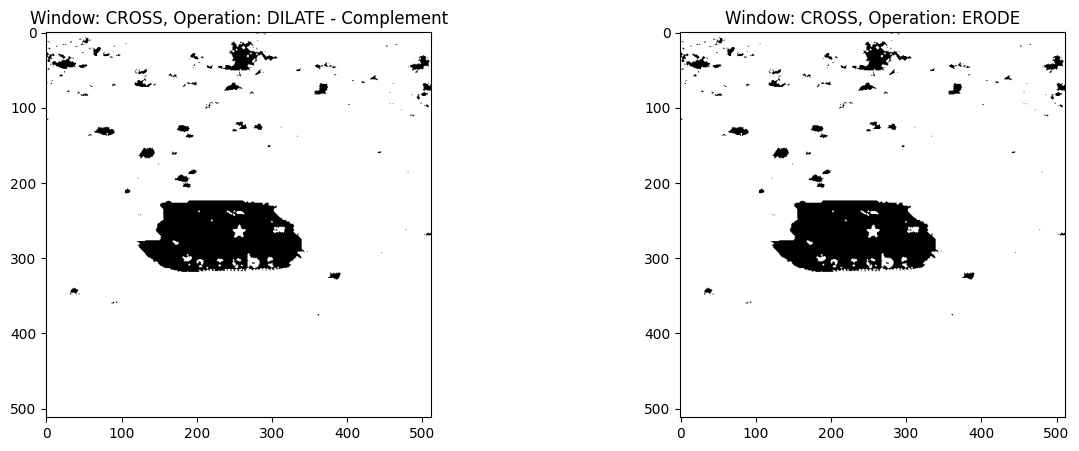

Erode is Complement of Dilate


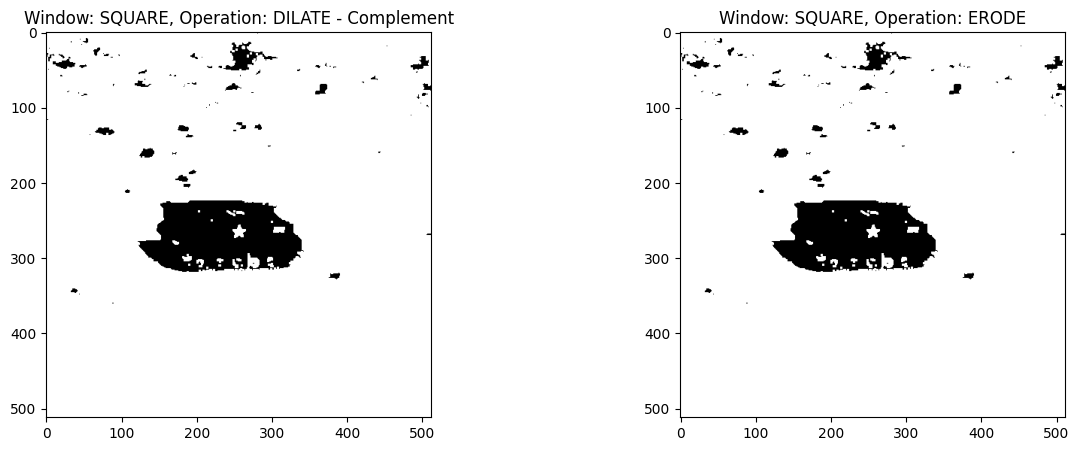

Erode is Complement of Dilate


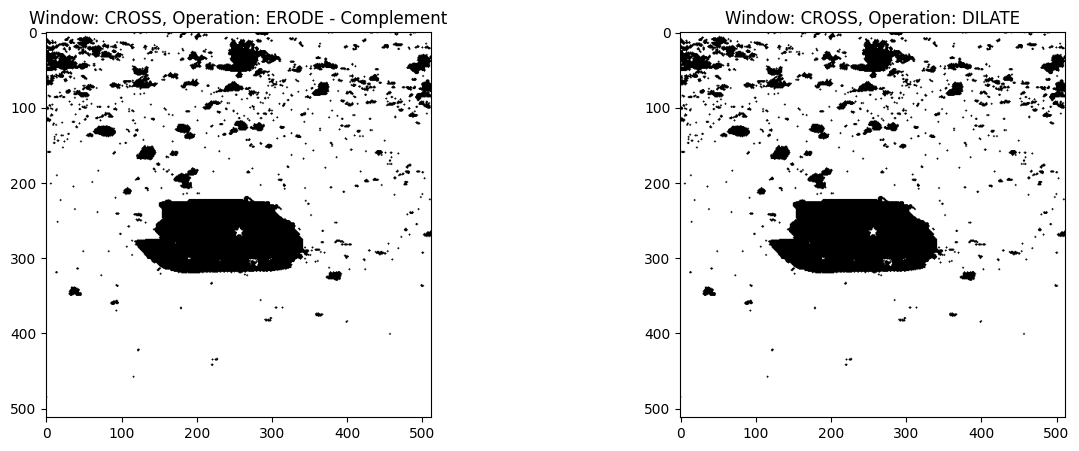

Dilate is Complement of Erode


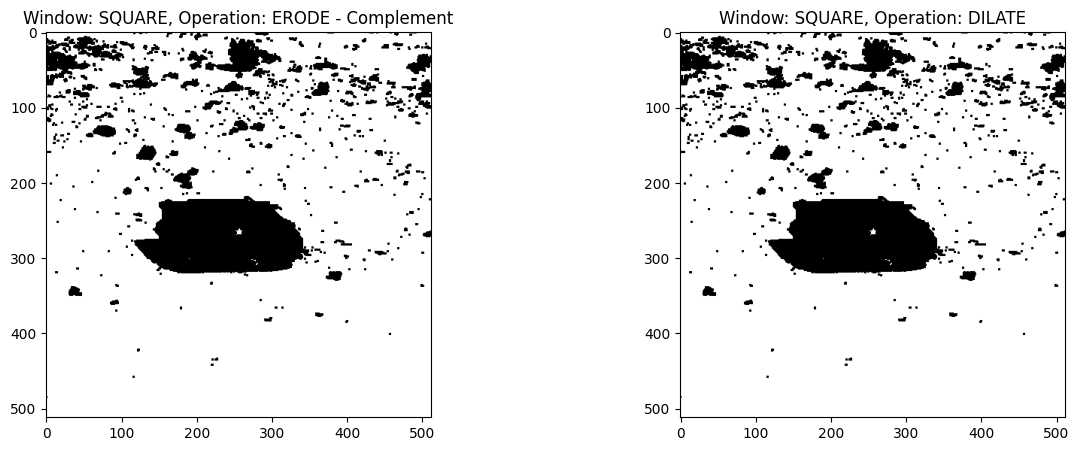

Dilate is Complement of Erode


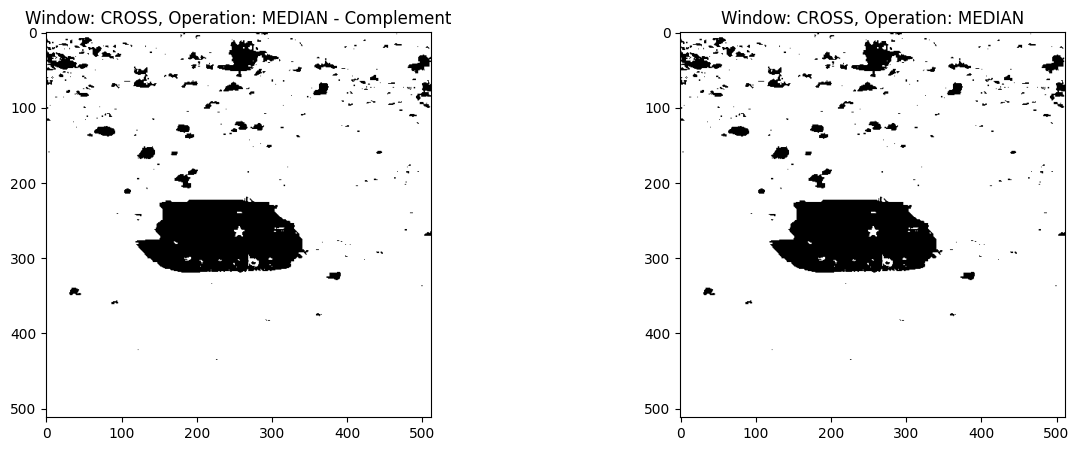

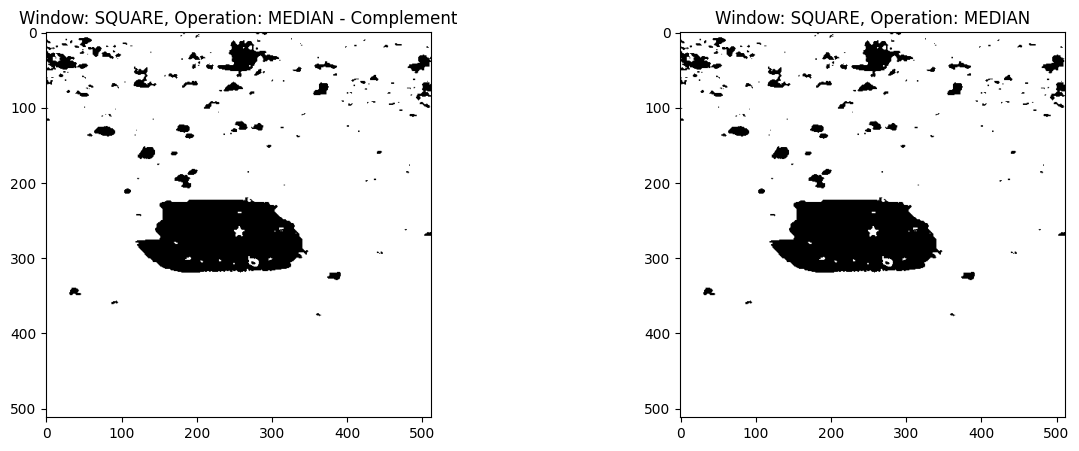

In [240]:
for win in win_ty:
  fig, axs = plt.subplots(1, 2, figsize=(15, 5))
  if win == 'CROSS':
    n = 5
  else:
    n = 3
  out1_1 = window(win, n, I_b)
  out1 = op(out1_1, 'DILATE')
  axs[0].imshow(out1, cmap = 'gray')
  axs[0].set_title(f'Window: {win}, Operation: DILATE - Complement')

  out1_2 = window(win, n, X)
  out = op(out1_2, 'ERODE')
  out = comp(out)
  axs[1].imshow(out, cmap = 'gray')
  axs[1].set_title(f'Window: {win}, Operation: ERODE')
  plt.show()
  if np.array_equal(out1, out):
    print('Erode is Complement of Dilate')

for win in win_ty:
  fig, axs = plt.subplots(1, 2, figsize=(15, 5))
  if win == 'CROSS':
    n = 5
  else:
    n = 3
  out1_1 = window(win, n, I_b)
  out1 = op(out1_1, 'ERODE')
  axs[0].imshow(out1, cmap = 'gray')
  axs[0].set_title(f'Window: {win}, Operation: ERODE - Complement')

  out1_2 = window(win, n, X)
  out = op(out1_2, 'DILATE')
  out = comp(out)
  axs[1].imshow(out, cmap = 'gray')
  axs[1].set_title(f'Window: {win}, Operation: DILATE')
  plt.show()
  if np.array_equal(out1, out):
    print('Dilate is Complement of Erode')

for win in win_ty:
  fig, axs = plt.subplots(1, 2, figsize=(15, 5))
  if win == 'CROSS':
    n = 5
  else:
    n = 3
  out1_1 = window(win, n, I_b)
  out1 = op(out1_1, 'MEDIAN')
  axs[0].imshow(out1, cmap = 'gray')
  axs[0].set_title(f'Window: {win}, Operation: MEDIAN - Complement')

  out1_2 = window(win, n, X)
  out = op(out1_2, 'MEDIAN')
  out = comp(out)
  axs[1].imshow(out, cmap = 'gray')
  axs[1].set_title(f'Window: {win}, Operation: MEDIAN')
  plt.show()
  if np.array_equal(out1, out):
    print('Median is Complement of Median')

plt.show()

Q3

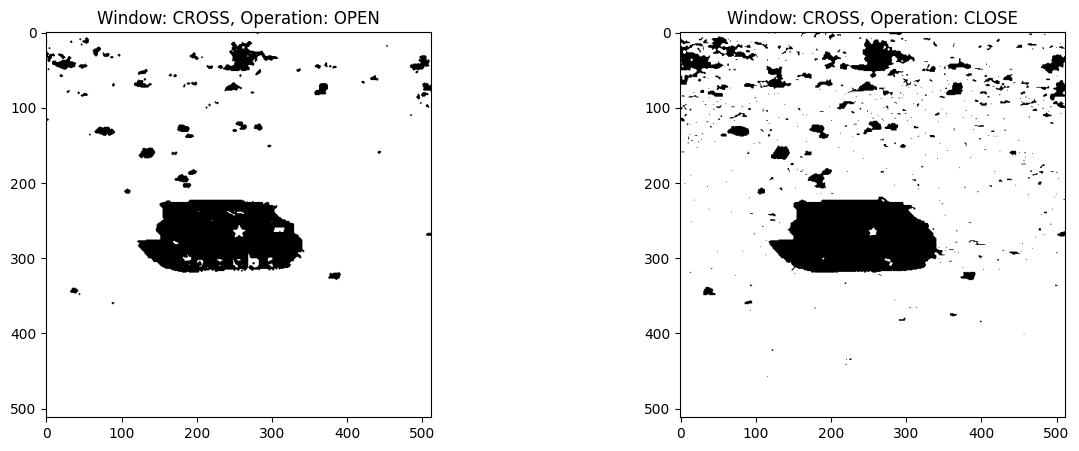

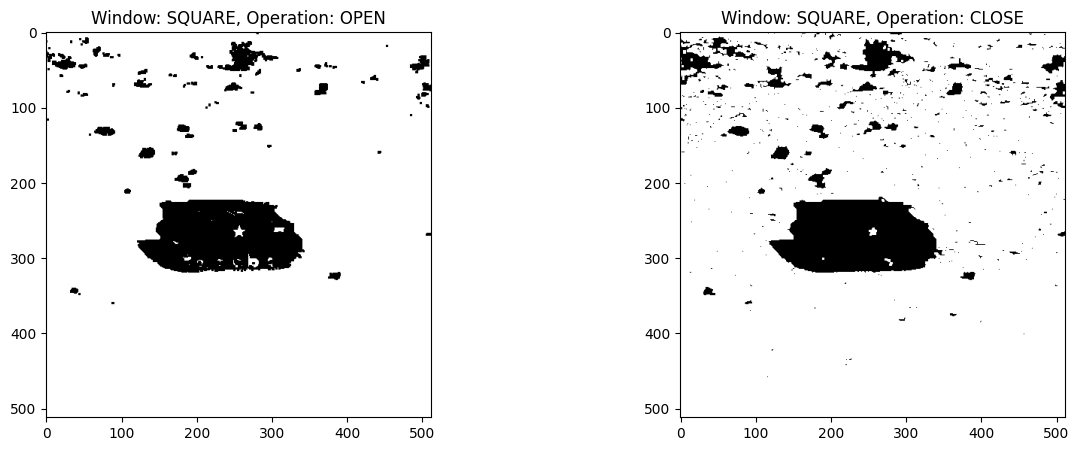

In [241]:
def open_(win, n, X):
  out1 = window(win, n, X)
  out2 = op(out1_2, 'ERODE')
  out2_1 = window(win, n, out2)
  out3 = op(out2_1, 'DILATE')
  return comp(out3)

def close(win, n, X):
  out1 = window(win, n, X)
  out2 = op(out1_2, 'DILATE')
  out2_1 = window(win, n, out2)
  out3 = op(out2_1, 'ERODE')
  return comp(out3)

for win in win_ty:
  if win == 'CROSS':
    n = 5
  else:
    n = 3

  fig, axs = plt.subplots(1, 2, figsize=(15, 5))
  out1 = open_(win, n, X)
  axs[0].imshow(out1, cmap = 'gray')
  axs[0].set_title(f'Window: {win}, Operation: OPEN')

  out2 = close(win, n, X)
  axs[1].imshow(out2, cmap = 'gray')
  axs[1].set_title(f'Window: {win}, Operation: CLOSE')

plt.show()

Q4

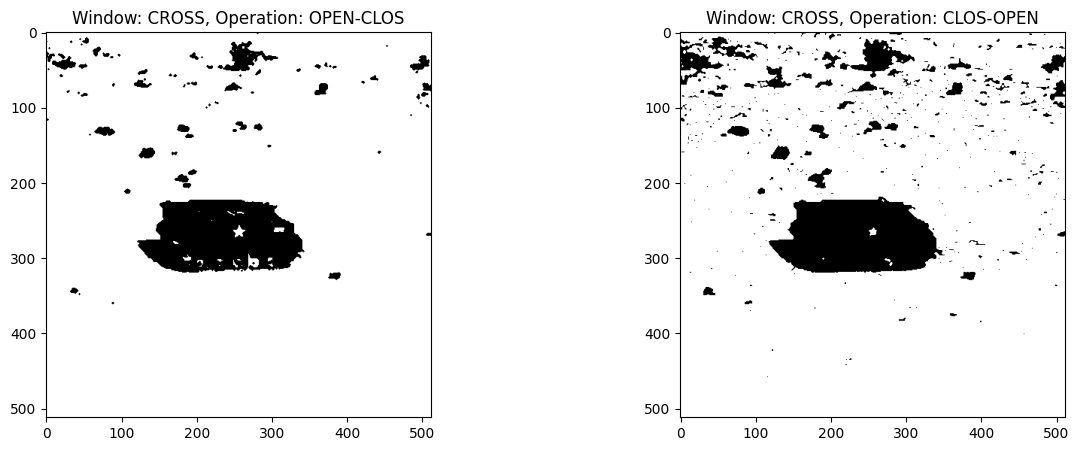

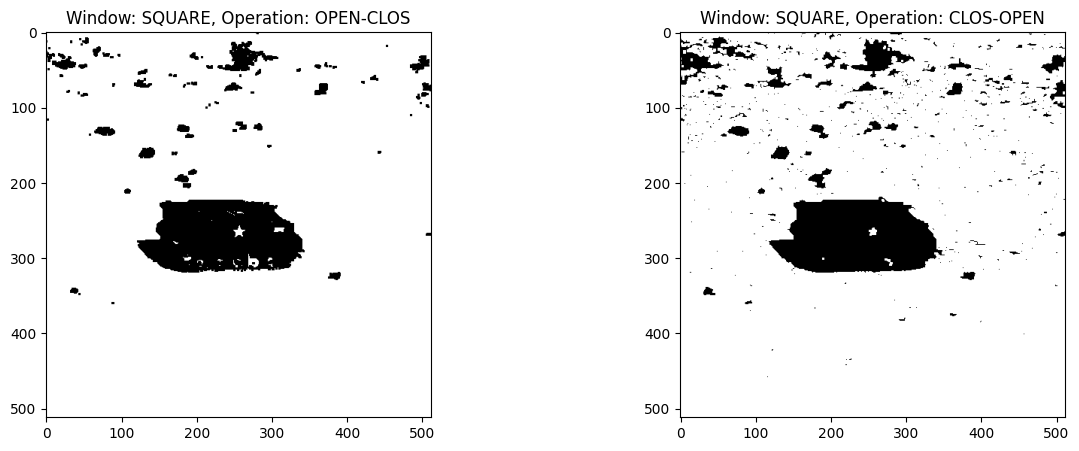

In [242]:
def open_close(win, n, X):
  out1 = close(win, n, X)
  return open_(win, n, X)

def close_open(win, n, X):
  out1 = open_(win, n, X)
  return close(win, n, X)

for win in win_ty:
  if win == 'CROSS':
    n = 5
  else:
    n = 3

  fig, axs = plt.subplots(1, 2, figsize=(15, 5))
  out1 = open_close(win, n, X)
  axs[0].imshow(out1, cmap = 'gray')
  axs[0].set_title(f'Window: {win}, Operation: OPEN-CLOS')

  out2 = close_open(win, n, X)
  axs[1].imshow(out2, cmap = 'gray')
  axs[1].set_title(f'Window: {win}, Operation: CLOS-OPEN')

plt.show()

Q5

In [243]:
print(f'No of Pixels in the object of Interest, APC: {np.sum(1 - major_blob)}')

No of Pixels in the object of Interest, APC: 16387
